# 0 KR Appstore review wordcloud

In [1]:
import os
os.getcwd()

'C:\\Users\\LG\\DataScience\\Project\\NO_3_ZEPETO\\Crawling'

In [2]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

# 1 워드클라우드에 필요한 라이브러리를 불러옵니다

In [3]:
# 워드크라우드에 사용할 라이브러리를 불러옵니다
import pandas as pd
import numpy as np
import re

In [4]:
df = pd.read_csv('data/zepeto_kr_review.csv', encoding = 'utf-8')
df.head()

,DATE,STAR,LIKE,DISLIKE,TITLE,REVIEW
0,2022-07-22 16:51:14,5,0,0,너무 고마워요…💗,으아아아아아ㅏㅏㅏㅏ\n드디어 크리템이!!!!!!!!!!\n아아아아 고마워요오오오오❤️
1,2022-07-22 11:25:05,1,0,0,후..,"아니 31일째인데 선물이 안보내져요. 제가 왠만하면 말 안하는데 저도 사정이 있고,..."
2,2022-07-22 07:54:59,5,0,0,"허위신고, 오류, 불찰도 검토 해주세요😥",저는 제페토 초창기 때부터 열심히 꾸준히 캐릭터를 키워 온 유저입니다. 저는 신고 ...
3,2022-07-22 07:13:59,1,0,0,ㅋ,ㅈㄴ 잼민이들만 하는 게임임 \n이거 왜함 장애새끼들아 ㅋㅋㅋㅋ\n잼민이들아 걍 쳐...
4,2022-07-22 02:14:56,5,0,0,좋음,갑자기 제페토 메세지가 다 지워질수있나요?\n지운건 아닌데 다 날아가는거라고 해야하...


# 2 wordcloud 환경 세팅

## NLTK 자연어 처리

In [5]:
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [6]:
# 말뭉치(corpus)는 자연어 분석 작업을 위해 만든 샘플 문서 집합을 말한다.
corpus = DoublespaceLineCorpus('data/zepeto_kr_review.csv')
len(corpus)

1065

In [7]:
word_extractor = WordExtractor()
word_extractor.train(corpus)

training was done. used memory 0.135 Gb


In [8]:
corpus = DoublespaceLineCorpus('data/zepeto_kr_review.csv', iter_sent = True)
len(corpus)

1053

In [9]:
# 잘 변환 되었는지 4개만 돌려보기 -> 문장을 토큰화 해보자 
i = 0
for d in corpus:
    print(i,d)
    i +=1
    if i > 4 :
        break

0 DATE,STAR,LIKE,DISLIKE,TITLE,REVIEW
1 2022-07-22 16:51:14,5,0,0,너무 고마워요…💗,"으아아아아아ㅏㅏㅏㅏ
2 드디어 크리템이!!!!!!!!!!
3 아아아아 고마워요오오오오❤️"
4 2022-07-22 11:25:05,1,0,0,후..,"아니 31일째인데 선물이 안보내져요. 제가 왠만하면 말 안하는데 저도 사정이 있고, 이건 아닌것 같습니다. 계속 회원가입 후 30일 어쩌고 진짜 어이없네요"


## RegexTokenizer 사용하기
https://github.com/lovit/soynlp
-  soynlp 는 세 가지 토크나이저를 제공
- LTokenizer : L parts 에는 명사/동사/형용사/부사가 위치할 수 있습니다. 어절에서 L 만 잘 인식한다면 나머지 부분이 R parts 가 됩니다. LTokenizer 에는 L parts 의 단어 점수를 입력합니다.

- MaxScoreTokenizer : 띄어쓰기가 제대로 지켜지지 않은 데이터라면, 문장의 띄어쓰기 기준으로 나뉘어진 단위가 L + [R] 구조라 가정할 수 없습니다. 하지만 사람은 띄어쓰기가 지켜지지 않은 문장에서 익숙한 단어부터 눈에 들어옵니다. 이 과정을 모델로 옮긴 MaxScoreTokenizer 역시 단어 점수를 이용합니다.

- RegexTokenizer : 규칙 기반으로도 단어열을 만들 수 있습니다. 언어가 바뀌는 부분에서 우리는 단어의 경계를 인식합니다. 예를 들어 "아이고ㅋㅋㅜㅜ진짜?" 는 [아이고, ㅋㅋ, ㅜㅜ, 진짜, ?]로 쉽게 단어열을 나눕니다.

In [10]:
df = pd.read_csv('data/zepeto_kr_review.csv', encoding="utf-8")

In [100]:
r12 = df[df['STAR'].astype(str).str.contains('1') | df['STAR'].astype(str).str.contains('2')]
r12

,DATE,STAR,LIKE,DISLIKE,TITLE,REVIEW
1,2022-07-22 11:25:05,1,0,0,후..,"아니 31일째인데 선물이 안보내져요. 제가 왠만하면 말 안하는데 저도 사정이 있고,..."
3,2022-07-22 07:13:59,1,0,0,ㅋ,ㅈㄴ 잼민이들만 하는 게임임 \n이거 왜함 장애새끼들아 ㅋㅋㅋㅋ\n잼민이들아 걍 쳐...
9,2022-07-21 05:25:32,2,0,0,비번 까먹은 후,안녕하세요 제가 전에 잠깐 지워서 다시 깔았다가 하려구 이메일 클릭했는데 비번을 까...
12,2022-07-20 04:47:41,1,0,0,ㅇㄴ 빡치네,"아니 계속 튕겨요…핑,렉도 계속 걸리고….진짜 너무해서 구취 하고싶었음"
18,2022-07-18 21:04:22,1,0,0,1점도아깝다,안녕하세요.저는초등학생유저입니다. 어느날제페토를알게되었어요 그래서깔았는데가입이너무힘...
...,...,...,...,...,...,...
475,2022-04-10 14:11:06,1,0,0,그지 같음,뭐만 하면 따라하고 이름 다르게 하면 모르줄 아냐?
489,2022-04-08 09:02:58,1,0,0,무얼 개선한 겁니까.,업뎃 다시 한 상태가 뭐가 달라진 건가요. 아이패드서 불편한 세로모드 여전하고 옷갈...
490,2022-04-08 08:35:42,2,0,0,아이패드 화면비율,업데이트 하고나서 비율이 이상해졌는데 너무 불편해요\n꽉찼으면 화질이라도 좋아야하는...
494,2022-04-07 19:31:33,2,0,0,업뎃관련,업데이트 된건지 모르겠는데… 갑자기 인물이 너무 멍해져있는 모습으로만 있고 원래 옷...


### 2-1 REVIEW 컬럼으로 워드클라우드

In [101]:
# 여기서 review 컬럼만 갖구올거임
r12

,DATE,STAR,LIKE,DISLIKE,TITLE,REVIEW
1,2022-07-22 11:25:05,1,0,0,후..,"아니 31일째인데 선물이 안보내져요. 제가 왠만하면 말 안하는데 저도 사정이 있고,..."
3,2022-07-22 07:13:59,1,0,0,ㅋ,ㅈㄴ 잼민이들만 하는 게임임 \n이거 왜함 장애새끼들아 ㅋㅋㅋㅋ\n잼민이들아 걍 쳐...
9,2022-07-21 05:25:32,2,0,0,비번 까먹은 후,안녕하세요 제가 전에 잠깐 지워서 다시 깔았다가 하려구 이메일 클릭했는데 비번을 까...
12,2022-07-20 04:47:41,1,0,0,ㅇㄴ 빡치네,"아니 계속 튕겨요…핑,렉도 계속 걸리고….진짜 너무해서 구취 하고싶었음"
18,2022-07-18 21:04:22,1,0,0,1점도아깝다,안녕하세요.저는초등학생유저입니다. 어느날제페토를알게되었어요 그래서깔았는데가입이너무힘...
...,...,...,...,...,...,...
475,2022-04-10 14:11:06,1,0,0,그지 같음,뭐만 하면 따라하고 이름 다르게 하면 모르줄 아냐?
489,2022-04-08 09:02:58,1,0,0,무얼 개선한 겁니까.,업뎃 다시 한 상태가 뭐가 달라진 건가요. 아이패드서 불편한 세로모드 여전하고 옷갈...
490,2022-04-08 08:35:42,2,0,0,아이패드 화면비율,업데이트 하고나서 비율이 이상해졌는데 너무 불편해요\n꽉찼으면 화질이라도 좋아야하는...
494,2022-04-07 19:31:33,2,0,0,업뎃관련,업데이트 된건지 모르겠는데… 갑자기 인물이 너무 멍해져있는 모습으로만 있고 원래 옷...


In [102]:
p1 = r'.*(메세지 | 커마 | 캐릭터 | 옷 | 오류 | 크리템).*'
pro1 = r12[r12['REVIEW'].str.match(p1)]
pro1.shape

(6, 6)

In [103]:
pro1.head()

,DATE,STAR,LIKE,DISLIKE,TITLE,REVIEW
61,2022-07-13 02:46:00,1,0,0,월드 들어갈려고 하면 자꾸 다운로드 실패라는데요,아이폰 13프로 쓰는데 월드만 들어가려고 하면 계속 다운로드 실패라네요 게임 내 오...
156,2022-06-24 18:59:28,1,1,0,제작자 누구냐?이거 읽어라~,제페토를 억지로 하고 있는 유저입니다. 저는 초5인 학생인데요 저 같은 케이스는 제...
259,2022-06-02 08:02:49,1,0,0,바뀐 거 너무 불편함,전체적으로 위치나 그런 게 많이 바뀌었는데 예전이 훨씬 나아요 ㅠㅠ…. 제발…… 옷...
339,2022-05-10 02:53:32,1,0,0,젬을 많이 줘라;;;,현질하라는 건가..진짜 젬을 많이 주세요… 현질 못하는 사람들은 캐릭터 자유대로 못...
387,2022-04-29 22:18:57,1,0,0,.,처음에는 좋았는데 가면 갈수록 다 잼인 아이템만 나오니까 현질안하면 할 수 없는 게...


In [110]:
from soynlp.tokenizer import RegexTokenizer
tokenizer = RegexTokenizer()
tokenizer

In [111]:
tokened_content = tokenizer.tokenize(sample_content)
sample_content[:]

'다 좋은데 아쉬운 점 🤧'

In [112]:
#  파이썬 개행문자 제거 
##(출처: 오늘코드 | https://www.youtube.com/watch?v=bAJW02Cmw1o)
def preprocess(text):
         text = re.sub('\\\\n', ' ', text)
         return text

In [113]:
%time
sentences01 = r12['REVIEW'].apply(preprocess)

Wall time: 0 ns


In [114]:
#RegexTokenizer로 문자열 분리 완료 ~ 
%time
tokens1 = sentences01.apply(tokenizer.tokenize)
tokens1[:]

Wall time: 0 ns


1      [아니, 31, 일째인데, 선물이, 안보내져요, ., 제가, 왠만하면, 말, 안하는...
3      [ㅈㄴ, 잼민이들만, 하는, 게임임, 이거, 왜함, 장애새끼들아, ㅋㅋㅋㅋ, 잼민이...
9      [안녕하세요, 제가, 전에, 잠깐, 지워서, 다시, 깔았다가, 하려구, 이메일, 클...
12     [아니, 계속, 튕겨요, …, 핑, ,, 렉도, 계속, 걸리고, …., 진짜, 너무...
18     [안녕하세요, ., 저는초등학생유저입니다, ., 어느날제페토를알게되었어요, 그래서깔...
                             ...                        
475              [뭐만, 하면, 따라하고, 이름, 다르게, 하면, 모르줄, 아냐, ?]
489    [업뎃, 다시, 한, 상태가, 뭐가, 달라진, 건가요, ., 아이패드서, 불편한, ...
490    [업데이트, 하고나서, 비율이, 이상해졌는데, 너무, 불편해요, 꽉찼으면, 화질이라...
494    [업데이트, 된건지, 모르겠는데, …, 갑자기, 인물이, 너무, 멍해져있는, 모습으...
495                                    [전이, 훨씬, 나아요, ..]
Name: REVIEW, Length: 125, dtype: object

#### 리뷰 워드클라우드 생성

#선명한 display를 위해 retina 옵션 추가 
%config InlineBackend.figure_format = 'retina'

In [115]:
# 워드클라우드에 필요한 라이브러리를 불러옵니다 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
# 워드클라우드는 c++ 설치가 선행되어야 설치할 수 있다 
# https://decdream08.tistory.com/2
#https://mithumbsup.tistory.com/12

In [ ]:
# 워드클라우드 설치
!pip install wordcloud

In [29]:
# 워드클라우드 라이브러리를 불러옵니다 
from wordcloud import WordCloud
from wordcloud import STOPWORDS

#### 불용어 지정

In [141]:
stopwords_kr = ['하지만', '그리고', '그런데', '나는', '저는', '제가', '내가',
 '그럼', '매우', '!!!', '!', '!!', '!!!!', '내', '정말',
 '많이', '많은', '것을', '이런', '저런', '합니다', 'KKKK', '제품을'
 , '장애새끼들아', 'ㅈㄴ',  'ㅋㅋㅋ','아니','안녕하세요','다', '좀', '수']

In [117]:
# 워드클라우드 폰트 지정 
#  https://www.inflearn.com/questions/31934
fontpath = 'C:/Users/LG/AppData/Local/Microsoft/Windows/Fonts/AppleSDGothicNeoM.ttf'

In [118]:
import matplotlib.pyplot as plt    
%matplotlib inline 

In [142]:
def displayWordCloud(data = None,
                     backgroundcolor = 'white', 
                     width = 1200,
                     height = 900):
    wordcloud = WordCloud(
    font_path = fontpath,
    stopwords = stopwords_kr, #불용어 제거 
    background_color = backgroundcolor,
    width = width, height = height).generate(data)
    plt.figure(figsize = (20, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [ ]:
# https://hyeonukdev.github.io/2020/05/04/Error/WordCloud/

#### 워드클라우드 표현하기 

Wall time: 0 ns


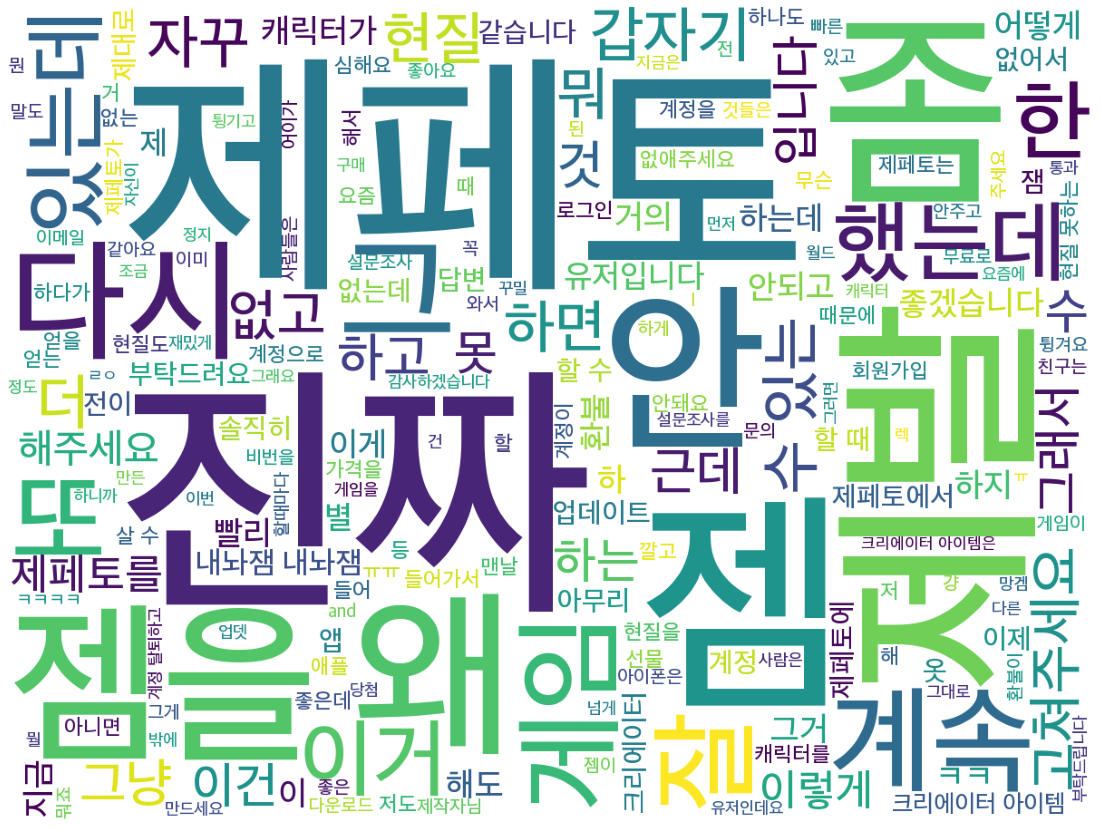

In [120]:
%time
displayWordCloud(' '.join(sentences01))

#### 특정 단어를 포함하는 워드클라우드 생성하기 

Wall time: 0 ns
Wall time: 0 ns


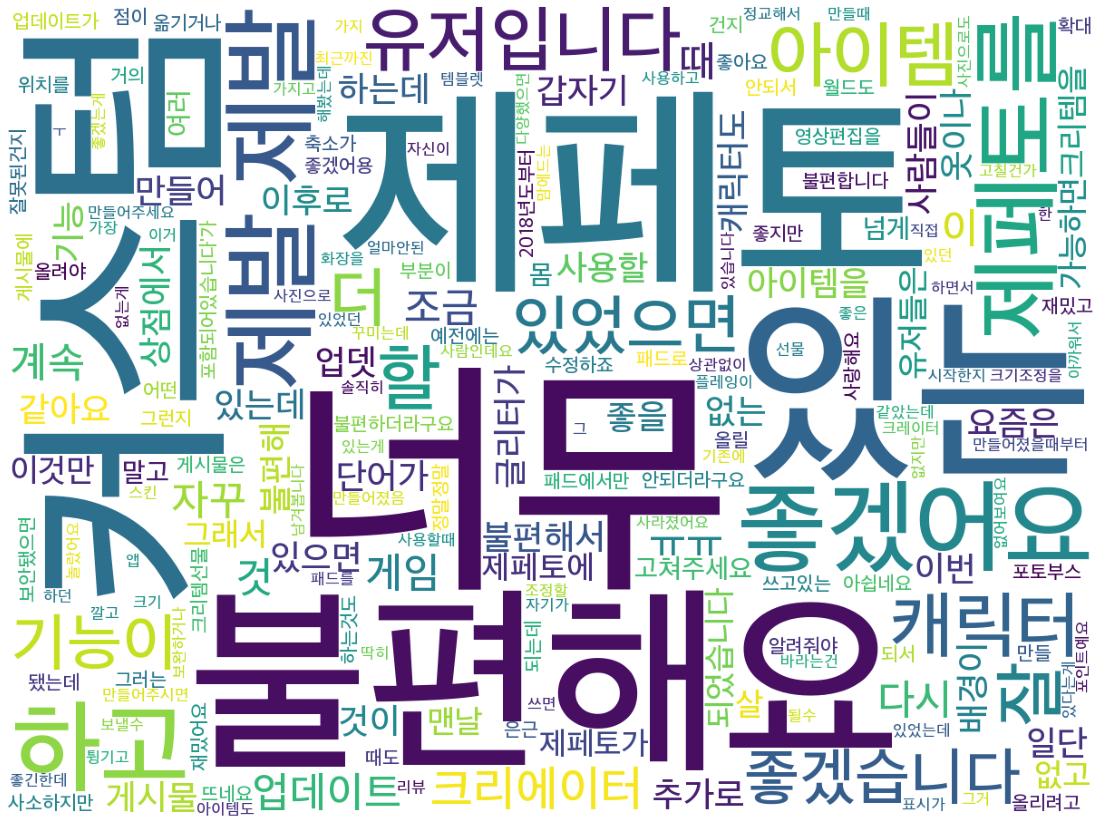

In [143]:
p1 = r'.*(커스텀 |불편해).*'
collect01 = df[df['REVIEW'].str.match(p1)]
%time
col01 = collect01['REVIEW'].apply(preprocess)
%time
displayWordCloud(' '.join(col01))

Wall time: 0 ns
Wall time: 0 ns


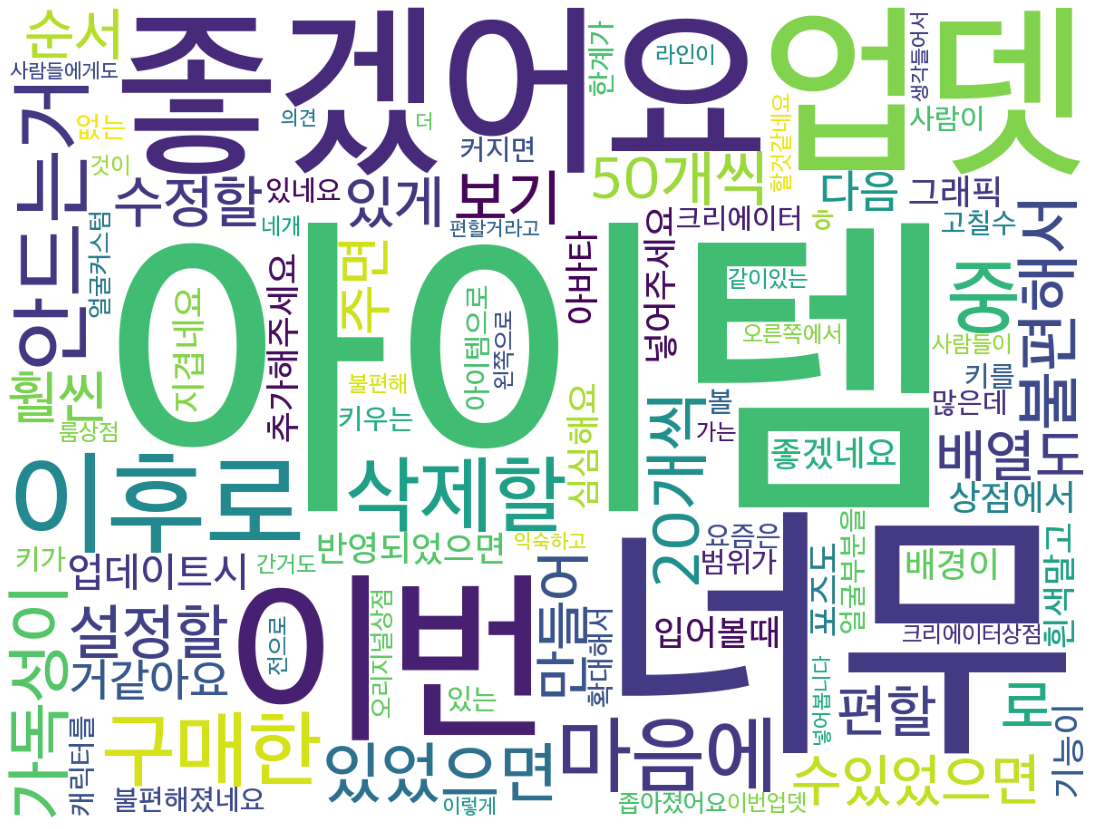

In [155]:
p1 = r'.*(상점 | 배열).*'
collect01 = df[df['REVIEW'].str.match(p1)]
%time
col01 = collect01['REVIEW'].apply(preprocess)
%time
displayWordCloud(' '.join(col01))

In [53]:
# 여기서 TITLE 컬럼만 갖구올거임
df

,DATE,STAR,LIKE,DISLIKE,TITLE,REVIEW
0,2022-07-22 16:51:14,5,0,0,너무 고마워요…💗,으아아아아아ㅏㅏㅏㅏ\n드디어 크리템이!!!!!!!!!!\n아아아아 고마워요오오오오❤️
1,2022-07-22 11:25:05,1,0,0,후..,"아니 31일째인데 선물이 안보내져요. 제가 왠만하면 말 안하는데 저도 사정이 있고,..."
2,2022-07-22 07:54:59,5,0,0,"허위신고, 오류, 불찰도 검토 해주세요😥",저는 제페토 초창기 때부터 열심히 꾸준히 캐릭터를 키워 온 유저입니다. 저는 신고 ...
3,2022-07-22 07:13:59,1,0,0,ㅋ,ㅈㄴ 잼민이들만 하는 게임임 \n이거 왜함 장애새끼들아 ㅋㅋㅋㅋ\n잼민이들아 걍 쳐...
4,2022-07-22 02:14:56,5,0,0,좋음,갑자기 제페토 메세지가 다 지워질수있나요?\n지운건 아닌데 다 날아가는거라고 해야하...
...,...,...,...,...,...,...
495,2022-04-07 10:25:11,1,0,0,옷입힐때 표정 바뀐거 너무 이상해요,전이 훨씬 나아요..
496,2022-04-07 08:11:49,5,0,0,화질좀,제페토 짱~~\n아이패드 화질좀 올려주세여
497,2022-04-07 04:58:56,4,0,0,보충이 필요해요.,안녕하세요 제페토 3년차 유저인데요.\n재페토에는 꼭 보충할점이 있습니다.\n1.크...
498,2022-04-07 04:58:35,5,0,0,제페토,진짜 오랫동안 해 왔는데 다른 건 다 좋아요 그렇지만 이건 좀 너무한 거 아닌가요ㅠ...


In [54]:
p1 = r'.*(메세지 | 커마 | 캐릭터 | 옷 | 오류 | 크리템 | 계정).*'
pro1 = df[df['TITLE'].str.match(p1)]
pro1.shape

(13, 6)

In [55]:
pro1.head()

,DATE,STAR,LIKE,DISLIKE,TITLE,REVIEW
19,2022-07-18 19:11:22,1,0,0,망둥어 오류 고쳐주세요 제발요,월드에 가면 자꾸 기존에 있던 아바타가 키가 작아지면서 망둥어가 되는데 제발 고쳐주...
38,2022-07-15 23:12:07,5,0,0,제 계정좀 살려주세요 제발...,트위터 로그인인데 트위터 계정이 없어졌어요 계정 아이디도 기억나요 _x_kyoxae...
108,2022-07-06 23:02:22,3,0,0,실수로 없어진 내 1.0k 계정...ㅜ-ㅜ,안녕 하세요..1.0k 계정을 잃어 버린.. 사람 입니다..\n부계를 만들려고 하다...
117,2022-07-04 12:26:44,1,0,0,날라간 계정,날라간 계정을 몇개월째 사용 못하고 있습니다\n그 계정으로 현질도 많이하고 이제 1...
139,2022-06-30 00:09:18,5,0,0,제발 접속 하자마자 튕기는거 버그 실화인가요?? 접은거 같아서 섭섭해요 서비스 제발...,4개월 전 부터 안 들어 가져요 ㅠㅠ 이거 언제 풀리나요?? 2020년부터 해왔는데...


In [56]:
sample_index = 10

In [57]:
sample_content = df['TITLE'][sample_index]
sample_content

'다 좋은데 아쉬운 점 🤧'

In [58]:
from soynlp.tokenizer import RegexTokenizer
tokenizer = RegexTokenizer()
tokenizer

In [59]:
tokened_content = tokenizer.tokenize(sample_content)
sample_content[:]

'다 좋은데 아쉬운 점 🤧'

In [60]:
#  파이썬 개행문자 제거 
##(출처: 오늘코드 | https://www.youtube.com/watch?v=bAJW02Cmw1o)
def preprocess(text):
         text = re.sub('\\\\n', ' ', text)
         return text

In [61]:
%time
sentences01 = df['TITLE'].apply(preprocess)

Wall time: 0 ns


In [62]:
#RegexTokenizer로 문자열 분리 완료 ~ 
%time
tokens1 = sentences01.apply(tokenizer.tokenize)
tokens1[:]

Wall time: 0 ns


0                          [너무, 고마워요, …💗]
1                                 [후, ..]
2      [허위신고, ,, 오류, ,, 불찰도, 검토, 해주세요, 😥]
3                                     [ㅋ]
4                                    [좋음]
                      ...                
495             [옷입힐때, 표정, 바뀐거, 너무, 이상해요]
496                                 [화질좀]
497                        [보충이, 필요해요, .]
498                                 [제페토]
499                      [캐릭터, 표정, ,, 포즈]
Name: TITLE, Length: 500, dtype: object

#### 리뷰 워드클라우드 생성

#선명한 display를 위해 retina 옵션 추가 
%config InlineBackend.figure_format = 'retina'

In [63]:
# 워드클라우드에 필요한 라이브러리를 불러옵니다 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [64]:
# 워드클라우드는 c++ 설치가 선행되어야 설치할 수 있다 
# https://decdream08.tistory.com/2
#https://mithumbsup.tistory.com/12

In [65]:
# 워드클라우드 설치
!pip install wordcloud

In [66]:
# 워드클라우드 라이브러리를 불러옵니다 
from wordcloud import WordCloud
from wordcloud import STOPWORDS

#### 불용어 지정

In [67]:
stopwords_kr = ['하지만', '그리고', '그런데', '나는', '저는', '제가', '내가',
 '그럼', '매우', '!!!', '!', '!!', '!!!!', '내', '정말', '너무',
 '많이', '많은', '것을', '이런', '저런', '합니다', 'KKKK', '제품을'
 ,'때부터', '훨씬', '전이', '다른', '지금까지', '다 좋은데', '장애새끼들아', 'ㅈㄴ',
 'ㅋㅋㅋ','아니','안녕하세요','다']

In [68]:
# 워드클라우드 폰트 지정 
#  https://www.inflearn.com/questions/31934
fontpath = 'C:/Users/LG/AppData/Local/Microsoft/Windows/Fonts/AppleSDGothicNeoM.ttf'

In [69]:
import matplotlib.pyplot as plt    
%matplotlib inline 

In [70]:
def displayWordCloud(data = None,
                     backgroundcolor = 'white', 
                     width = 1200,
                     height = 900):
    wordcloud = WordCloud(
    font_path = fontpath,
    stopwords = stopwords_kr, #불용어 제거 
    background_color = backgroundcolor,
    width = width, height = height).generate(data)
    plt.figure(figsize = (20, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [71]:
# https://hyeonukdev.github.io/2020/05/04/Error/WordCloud/

#### 워드클라우드 표현하기 

Wall time: 0 ns


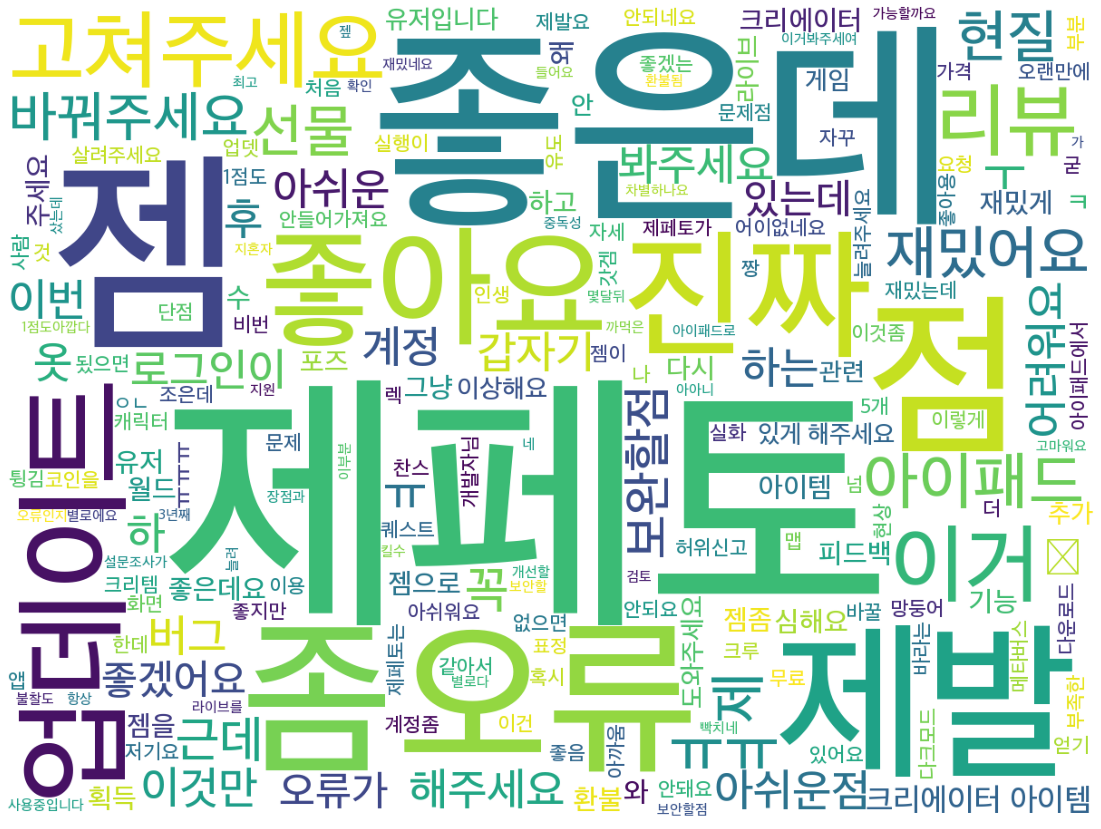

In [72]:
%time
displayWordCloud(' '.join(sentences01))

#### 특정 단어를 포함하는 워드클라우드 생성하기 

In [81]:
p1 = r'.*(어려).*'
collect01 = df[df['REVIEW'].str.match(p1)]
collect01.shape

(15, 6)

Wall time: 0 ns
Wall time: 0 ns


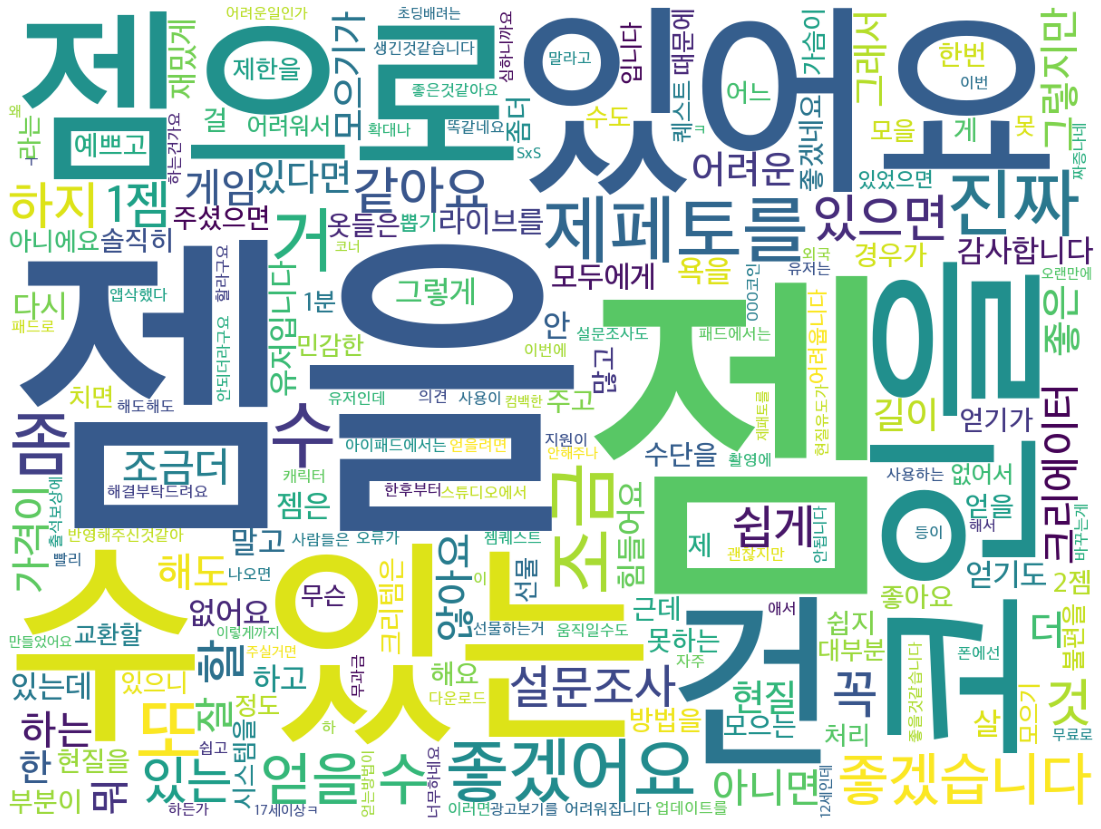

In [82]:
%time
col01 = collect01['REVIEW'].apply(preprocess)
%time
displayWordCloud(' '.join(col01))